In [2]:
!pip install mediapipe


In [3]:
!pip install --upgrade mediapipe


In [5]:
import cv2
import mediapipe as mp
import numpy as np
import json

# Initialize MediaPipe Face Detection and Facial Landmarks
mp_face = mp.solutions.face_detection
mp_landmarks = mp.solutions.face_mesh



C:\Users\pc\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
face_detection = mp_face.FaceDetection()
face_mesh = mp_landmarks.FaceMesh()


# Function to calculate blink stress

In [7]:

def calculate_blink_stress(landmarks):
    #use the eye landmarks to detect blinking
    left_eye = landmarks[42:48]
    right_eye = landmarks[36:42]

    # Calculate the average vertical position of the eyes
    avg_y_left = np.mean(left_eye[:, 1])
    avg_y_right = np.mean(right_eye[:, 1])

    # Calculate blink stress based on the difference in vertical position
    blink_stress = abs(avg_y_left - avg_y_right)

    return blink_stress


# Function to calculate eyebrow stress

In [8]:
def calculate_eyebrow_stress(landmarks):
    # Implement your logic to calculate eyebrow stress based on landmarks
    # For example, you can use the eyebrow landmarks to detect raised or lowered eyebrows
    left_eyebrow = landmarks[22:27]
    right_eyebrow = landmarks[17:22]

    # Calculate eyebrow stress based on the difference in vertical position
    eyebrow_stress = abs(np.mean(left_eyebrow[:, 1]) - np.mean(right_eyebrow[:, 1]))

    return eyebrow_stress



# Function to calculate lip stress

In [9]:
def calculate_lip_stress(landmarks):
    # Implement your logic to calculate lip stress based on landmarks
    # For example, you can use the upper and lower lip landmarks to detect lip movement
    upper_lip = landmarks[50:53]
    lower_lip = landmarks[56:59]

    # Calculate lip stress based on the difference in vertical position
    lip_stress = abs(np.mean(upper_lip[:, 1]) - np.mean(lower_lip[:, 1]))

    return lip_stress



# Function to calculate head movement stress

In [10]:
def calculate_head_movement_stress(landmarks):
    # For example, you can use the position of the head in the frame
    head_position = landmarks[0]  # Assuming the first landmark represents the top of the head

    # Calculate head movement stress based on the position of the head
    head_movement_stress = head_position[1]  # Use the vertical position as an example

    return head_movement_stress



# Function to calculate mouth openness stress

In [11]:

def calculate_mouth_openness_stress(landmarks):
    # For example, you can use the mouth landmarks to detect the degree of mouth openness
    mouth_openness = landmarks[60:68]

    # Calculate mouth openness stress based on the difference in vertical position
    mouth_openness_stress = abs(np.mean(mouth_openness[:, 1]) - landmarks[152][1])  # Assuming landmark 152 represents the chin

    return mouth_openness_stress


# Function to calculate red face color feature

In [12]:

def calculate_red_face_color(landmarks, frame):
    # Extract the region around the nose
    nose_region = landmarks[27:36]

    # Calculate the average color in the region
    avg_color = np.mean(frame[nose_region[:, 1].astype(int), nose_region[:, 0].astype(int)], axis=0)

    # Calculate the redness of the face
    redness = avg_color[2]

    return redness


# Function to calculate eyebrow raise feature

In [13]:

def calculate_eyebrow_raise(landmarks):
    # Use the eyebrow landmarks to detect raised eyebrows
    left_eyebrow = landmarks[22:27]
    right_eyebrow = landmarks[17:22]

    # Calculate the average vertical position of the eyebrows
    avg_y_left = np.mean(left_eyebrow[:, 1])
    avg_y_right = np.mean(right_eyebrow[:, 1])

    # Calculate eyebrow raise feature based on the difference in vertical position
    eyebrow_raise = avg_y_left - avg_y_right

    return eyebrow_raise


In [21]:
def calculate_smile_detection(landmarks):
    # Use the lip landmarks to detect smile
    upper_lip = landmarks[50:53]
    lower_lip = landmarks[56:59]

    # Calculate the average vertical position of the lips
    avg_y_upper = np.mean(upper_lip[:, 1])
    avg_y_lower = np.mean(lower_lip[:, 1])

    # Calculate smile detection feature based on the absolute difference in vertical position
    smile_detection = abs(avg_y_upper - avg_y_lower)

    return smile_detection

# Open the video file
cap = cv2.VideoCapture("C:\\Users\\pc\\Pictures\\Camera Roll\\WIN_20230407_23_25_16_Pro.mp4")

# Initialize lists to store stress levels for each factor
blink_stress = []
eyebrow_stress = []
lip_stress = []
head_movement_stress = []
mouth_openness_stress = []
red_face_color_list = []
eyebrow_raise_list = []
smile_detection_list = []
# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect face and facial landmarks
    results_face = face_detection.process(frame)
    results_landmarks = face_mesh.process(rgb_frame)

    if results_face.detections:
        # Get facial landmarks
        landmarks = np.array([[landmark.x, landmark.y] for landmark in results_landmarks.multi_face_landmarks[0].landmark])

        # Placeholder for stress scores
        stress_blink = calculate_blink_stress(landmarks)
        stress_eyebrow = calculate_eyebrow_stress(landmarks)

        stress_lip = calculate_lip_stress(landmarks)
        stress_head_movement = calculate_head_movement_stress(landmarks)
        stress_mouth_openness = calculate_mouth_openness_stress(landmarks)
        red_face_color = calculate_red_face_color(landmarks, frame)
        eyebrow_raise = calculate_eyebrow_raise(landmarks)
        smile_detection = calculate_smile_detection(landmarks)
        # Append stress levels to lists
        blink_stress.append(stress_blink)
        eyebrow_stress.append(stress_eyebrow)
        lip_stress.append(stress_lip)
        head_movement_stress.append(stress_head_movement)
        mouth_openness_stress.append(stress_mouth_openness)
        red_face_color_list.append(red_face_color)
        eyebrow_raise_list.append(eyebrow_raise)
        smile_detection_list.append(smile_detection)
        # Debug prints
        print("Blink Stress:", stress_blink)
        print("Eyebrow Stress:", stress_eyebrow)
        print("Lip Stress:", stress_lip)
        print("Head Movement Stress:", stress_head_movement)
        print("Mouth Openness Stress:", stress_mouth_openness)
        print("Red Face Color:", red_face_color)
        print("Eyebrow Raise:", eyebrow_raise)
        print("Smile Detection:", smile_detection)
    else:
        # Print a message if no face is detected in the current frame
        print("No face detected in this frame.")

# Release the video capture object
cap.release()



Blink Stress: 0.06908463438351953
Eyebrow Stress: 0.11486710309982295
Lip Stress: 0.08912263313929236
Head Movement Stress: 0.6972688436508179
Mouth Openness Stress: 0.28854117542505264
Red Face Color: 147.0
Eyebrow Raise: -0.11486710309982295
Smile Detection: 0.08912263313929236
Blink Stress: 0.06785674889882398
Eyebrow Stress: 0.1143495619297028
Lip Stress: 0.0902130504449209
Head Movement Stress: 0.6897569894790649
Mouth Openness Stress: 0.28931473568081856
Red Face Color: 144.0
Eyebrow Raise: -0.1143495619297028
Smile Detection: 0.0902130504449209
Blink Stress: 0.06771746277809143
Eyebrow Stress: 0.1173043072223664
Lip Stress: 0.08929726481437683
Head Movement Stress: 0.6895103454589844
Mouth Openness Stress: 0.29313283786177635
Red Face Color: 143.0
Eyebrow Raise: -0.1173043072223664
Smile Detection: 0.08929726481437683
Blink Stress: 0.06782282392183936
Eyebrow Stress: 0.11669386625289924
Lip Stress: 0.08984792232513428
Head Movement Stress: 0.690382182598114
Mouth Openness Stress

Blink Stress: 0.06493616104125977
Eyebrow Stress: 0.11544244885444643
Lip Stress: 0.08840741713841754
Head Movement Stress: 0.6221281290054321
Mouth Openness Stress: 0.29173844307661057
Red Face Color: 175.0
Eyebrow Raise: -0.11544244885444643
Smile Detection: 0.08840741713841754
Blink Stress: 0.0640036712090174
Eyebrow Stress: 0.11302522420883182
Lip Stress: 0.09048803647359216
Head Movement Stress: 0.6149232983589172
Mouth Openness Stress: 0.2927235960960388
Red Face Color: 177.0
Eyebrow Raise: -0.11302522420883182
Smile Detection: 0.09048803647359216
Blink Stress: 0.06416379908720649
Eyebrow Stress: 0.11179461479187008
Lip Stress: 0.09016670783360797
Head Movement Stress: 0.60671466588974
Mouth Openness Stress: 0.2909883037209511
Red Face Color: 190.0
Eyebrow Raise: -0.11179461479187008
Smile Detection: 0.09016670783360797
Blink Stress: 0.06475924948851264
Eyebrow Stress: 0.11363929510116572
Lip Stress: 0.0899682144323985
Head Movement Stress: 0.5985009074211121
Mouth Openness Stres

Blink Stress: 0.0725774963696797
Eyebrow Stress: 0.12758199572563167
Lip Stress: 0.09004016717274987
Head Movement Stress: 0.6242992877960205
Mouth Openness Stress: 0.3071382939815521
Red Face Color: 193.0
Eyebrow Raise: -0.12758199572563167
Smile Detection: 0.09004016717274987
Blink Stress: 0.0724752893050512
Eyebrow Stress: 0.12736520767211917
Lip Stress: 0.08981790145238239
Head Movement Stress: 0.6250470280647278
Mouth Openness Stress: 0.306847732514143
Red Face Color: 195.0
Eyebrow Raise: -0.12736520767211917
Smile Detection: 0.08981790145238239
Blink Stress: 0.07267279922962189
Eyebrow Stress: 0.1282878696918487
Lip Stress: 0.08991710344950354
Head Movement Stress: 0.6275546550750732
Mouth Openness Stress: 0.30789706110954285
Red Face Color: 194.0
Eyebrow Raise: -0.1282878696918487
Smile Detection: 0.08991710344950354
Blink Stress: 0.07314057151476538
Eyebrow Stress: 0.1280247986316681
Lip Stress: 0.09037008881568914
Head Movement Stress: 0.6296992897987366
Mouth Openness Stress:

# Calculate aggregated stress based on equal weights for each factor

In [22]:
final_stress = (
    0.15 * np.array(blink_stress) +
    0.15 * np.array(eyebrow_stress) +

    0.15 * np.array(lip_stress) +
    0.15 * np.array(head_movement_stress) +
    0.15 * np.array(mouth_openness_stress)+
    0.15 * np.array(red_face_color_list) +
    0.15 * np.array(eyebrow_raise_list ) +
    0.15 * np.array(smile_detection_list)

)





# Create a dictionary to store stress levels

In [23]:
output_data = {
    "blink_stress": blink_stress,
    "eyebrow_stress": eyebrow_stress,

    "lip_stress": lip_stress,
    "head_movement_stress": head_movement_stress,
    "mouth_openness_stress": mouth_openness_stress,
    "red_face_color":red_face_color_list,
    "eyebrow_raise": eyebrow_raise_list,
    "smile_detection":smile_detection_list,
    "final_stress": final_stress.tolist()

}

# Save the output as JSON

In [24]:
with open("output.json", "w") as json_file:
    json.dump(output_data, json_file)

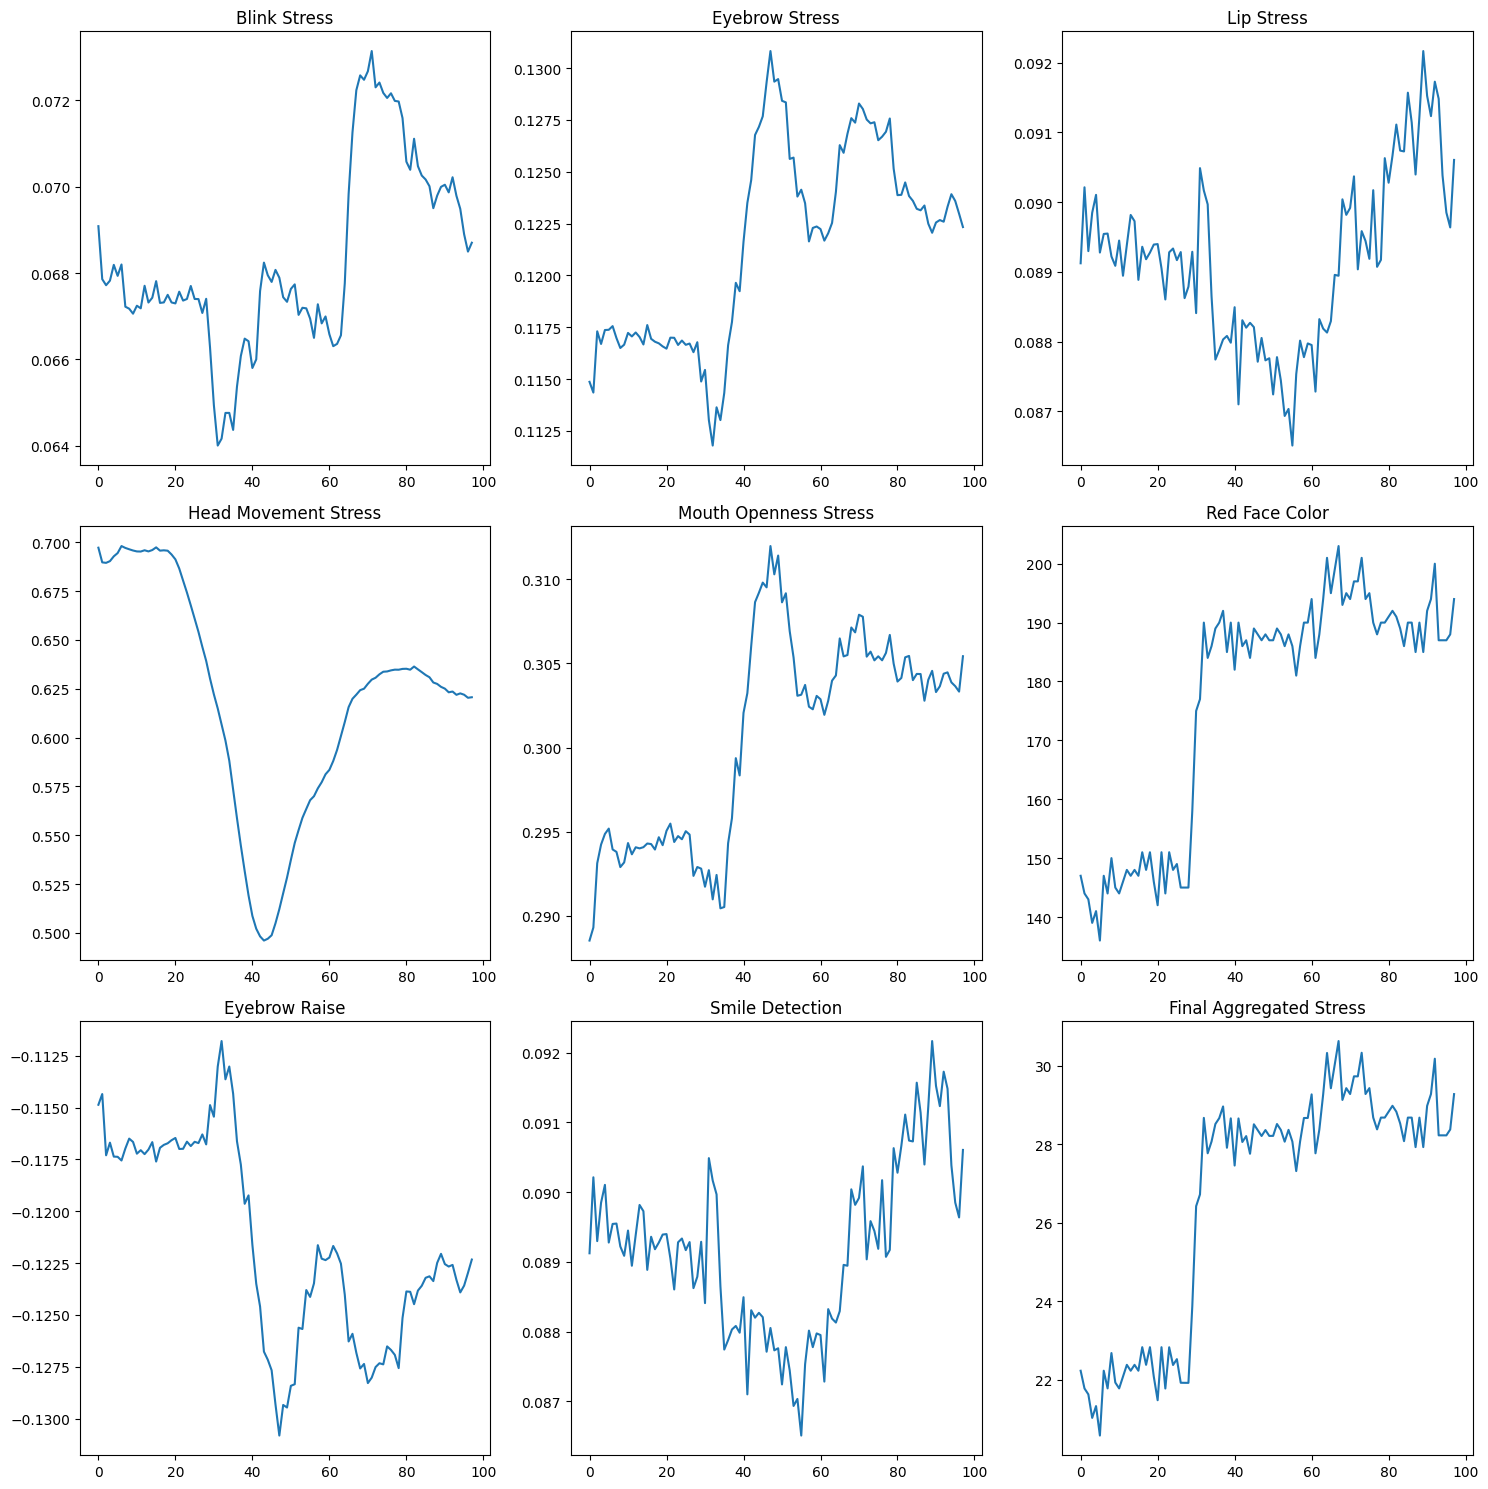

In [25]:
import matplotlib.pyplot as plt

# Load the output data from the saved JSON file
with open("output.json", "r") as json_file:
    output_data = json.load(json_file)

# Plotting stress levels over time
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Blink Stress
axes[0, 0].plot(output_data["blink_stress"])
axes[0, 0].set_title('Blink Stress')

# Eyebrow Stress
axes[0, 1].plot(output_data["eyebrow_stress"])
axes[0, 1].set_title('Eyebrow Stress')

# Lip Stress
axes[0, 2].plot(output_data["lip_stress"])
axes[0, 2].set_title('Lip Stress')

# Head Movement Stress
axes[1, 0].plot(output_data["head_movement_stress"])
axes[1, 0].set_title('Head Movement Stress')

# Mouth Openness Stress
axes[1, 1].plot(output_data["mouth_openness_stress"])
axes[1, 1].set_title('Mouth Openness Stress')

# Red Face Color
axes[1, 2].plot(output_data["red_face_color"])
axes[1, 2].set_title('Red Face Color')

# Eyebrow Raise
axes[2, 0].plot(output_data["eyebrow_raise"])
axes[2, 0].set_title('Eyebrow Raise')

# Smile Detection
axes[2, 1].plot(output_data["smile_detection"])
axes[2, 1].set_title('Smile Detection')

# Final Aggregated Stress
axes[2, 2].plot(output_data["final_stress"])
axes[2, 2].set_title('Final Aggregated Stress')

plt.tight_layout()
plt.show()


In [26]:
!pip install opencv-python dlib


  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build dlib


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [73 lines of output]
  running bdist_wheel
  running build
  running build_ext
  <string>:125: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  Building extension for Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\pc\AppData\Local\Temp\pip-install-90ccalaa\dlib_5788cb70e2584619a1c23a132ad283fd\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\pc\AppData\Local\Temp\pip-install-90ccalaa\dlib_5788cb70e2584619a1c23a132ad283fd\build\lib.win-amd64-cpython-39 -DPYTHON_EXECUTABLE=C:\Users\pc\anaconda3\python.exe -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\pc\AppData\Local\Temp\pip-install-90ccalaa\dlib_5788cb70e2584619a1c23a132ad283fd\build\lib.win-amd64-cpython-39 -A x64'
  -- Building for: NMake Makefiles
  CMake Error at CMakeLists.txt:5 (message):
  
  
  
    !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Train a predictive model to get feature importance scores

In [27]:

from sklearn.ensemble import RandomForestRegressor
import pandas as pd


# X_train is the stress features, y_train is the final stress
X_train = pd.DataFrame({
    'blink_stress': blink_stress,
    'eyebrow_stress': eyebrow_stress,
    'lip_stress': lip_stress,
    'head_movement_stress': head_movement_stress,
    'mouth_openness_stress': mouth_openness_stress,
    'red_face_color': red_face_color_list,
    'eyebrow_raise': eyebrow_raise_list,
    'smile_detection': smile_detection_list
})

y_train = final_stress

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)



RandomForestRegressor()

# Get feature importances

In [28]:

feature_importances = model.feature_importances_



# Normalize feature importances

In [29]:
normalized_importances = feature_importances / feature_importances.sum()

# Assign weights based on normalized importances

In [30]:
weights = 0.5 * normalized_importances  

# Use the weights and Update the final stress calculation

In [31]:

final_stress = (
    weights[0] * np.array(blink_stress) +
    weights[1] * np.array(eyebrow_stress) +
    weights[2] * np.array(lip_stress) +
    weights[3] * np.array(head_movement_stress) +
    weights[4] * np.array(mouth_openness_stress) +
    weights[5] * np.array(red_face_color_list) +
    weights[6] * np.array(eyebrow_raise_list) +
    weights[7] * np.array(smile_detection_list)
)